<a href="https://colab.research.google.com/github/Tetencha/data/blob/main/DDS_Stats_Clase_7_Actividad_solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ¿El color vuelve más atractivas las trampas para insectos?

El archivo _insectos.txt_ contiene los resultados de un experimento de trampas a insectos. Se diseñaron trampas de las mismas características salvo que diferían en el color, pudiendo ser de color amarillo, azul, blanco y verde. Estas trampas se dejaron expuestas por el mismo período de tiempo y luego se contó  el número de insectos que quedaron atrapados.


#### a) Obtenga estadísticas descriptivas del número de insectos atrapados por color de la trampa. Muestre en un gráfico los diagramas de caja para cada color de trampa. ¿Observa diferencias? ¿Qué podría concluir sobre el color de las trampas y la relación con insectos atrapados?

In [ ]:
!wget https://raw.githubusercontent.com/joshelml/Datos/main/insectos.txt

--2023-06-20 20:09:20--  https://raw.githubusercontent.com/joshelml/Datos/main/insectos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276 [text/plain]
Saving to: ‘insectos.txt’

insectos.txt        100%[===================>]     276  --.-KB/s    in 0s      

2023-06-20 20:09:21 (13.0 MB/s) - ‘insectos.txt’ saved [276/276]



In [ ]:
import pandas as pd
data = pd.read_csv("insectos.txt", sep=" ")
data

,insectos,colores
0,16,azul
1,11,azul
2,20,azul
3,21,azul
4,14,azul
5,7,azul
6,37,verde
7,32,verde
8,15,verde
9,25,verde


In [ ]:
### Promedios por color
promedios_colores = data.groupby('colores').agg(['count','mean'])

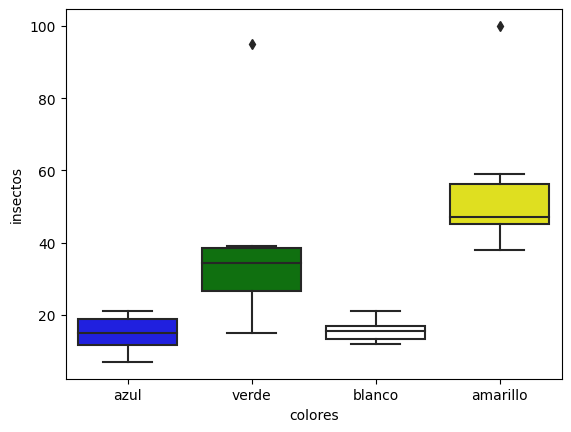

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
### Gráfico
### Sería genial, si cada color tuviera su color respectivo!
my_pal = {"azul": "blue", "verde": "green", "blanco":"white", "amarillo":"yellow"}

sns.boxplot(x = data["colores"],
            y = data["insectos"],
            palette=my_pal)
plt.show()

#### b) En el gráfico realizado en el apartado anterior, existen dos puntos alejados de los diagramas de caja en las trampas verde y amarillo. ¿Cómo pudieran afectar estas observaciones al momento de calcular los promedios por grupo para el modelo anova? Comente.

Estas observaciones al estar muy alejadas del resto de los datos (también conocidas como observaciones atípicas o en algunos casos, extremas), inflarán el promedio del número de insectos atrapados, generando promedios muy altos para los grupos verde y amarillo, lo cual puede generar residuos muy grandes del modelo en estas categorías.


#### c) Identifique la variable respuesta, el factor y sus niveles. Plantee el modelo a utilizar y ajústelo en Python, obtenga la tabla ANOVA realice el test F de significancia con un 90% de confianza (explicite las hipótesis del test).

La variable respuesta es el promedio del número de insectos atrapados. La variable factor corresponden a las trampas y toma 4 niveles (amarillo, azul, blanco y verde).
El modelo es:

$$Y_{ij}= \mu_{i} + \epsilon_{ij}$$

Donde $\mu_{i}=\mu+\alpha_{i}$, $\epsilon_{ij} \sim^{ind} N(0, \sigma^2)$ e $i = 1,..., r$ , $j = 1,..., n_i$

Para ajustar el modelo en Python, debemos definir la variable color de trampa como factor:

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sa
modelo = smf.ols('insectos ~ colores', data = data).fit()
anova_resultados = sa.stats.anova_lm(modelo,  typ=2)
anova_resultados

,sum_sq,df,F,PR(>F)
colores,7256.833333,3.0,7.221089,0.001804
Residual,6699.666667,20.0,NaN,NaN


Las hipótesis a testear son:

- $H_0: \mu_{amarillo}=\mu_{azul}=\mu_{blanco}=\mu_{verde}$
- $H_A$: Existe al menos un par de medias que difiere

El valor - p  es menor que $\alpha=10\%$ por lo tanto se rechaza que las medias de la cantidad de insectos atrapados sea igual para todos los colores de trampas.


#### d) Para realizar una revisión del supuesto de normalidad de los residuos del modelo siga los siguientes pasos:

#### d.1) Obtenga los residuos del modelo usando la función _resid()_ evaluada en el modelo creado.


In [ ]:
modelo.resid

0      1.166667
1     -3.833333
2      5.166667
3      6.166667
4     -0.833333
5     -7.833333
6     -3.500000
7     -8.500000
8    -25.500000
9    -15.500000
10    -1.500000
11    54.500000
12     5.333333
13    -3.666667
14    -1.666667
15     1.333333
16    -2.666667
17     1.333333
18   -11.000000
19     3.000000
20    -8.000000
21   -10.000000
22   -18.000000
23    44.000000
dtype: float64

#### d.2) Obtenga los residuos estandarizados del modelo utilizando la función _.get_influence()_ y luego _.resid_studentized_internal_ evaluada en el modelo creado.


In [ ]:
influence = modelo.get_influence()
standardized_residuals = influence.resid_studentized_internal
print(standardized_residuals)

[ 0.06982739 -0.22943285  0.30923559  0.36908764 -0.04987671 -0.46884105
 -0.20948217 -0.50874242 -1.52622725 -0.92770676 -0.08977807  3.26193667
  0.31921093 -0.21945751 -0.09975342  0.07980273 -0.15960546  0.07980273
 -0.65837254  0.17955615 -0.47881639 -0.59852049 -1.07733688  2.63349016]


#### d.3) Estudie gráficamente el supuesto de Normalidad cree una dataframe con los residuos luego obtenga el gráfico cuantil-cuantil. Comente.

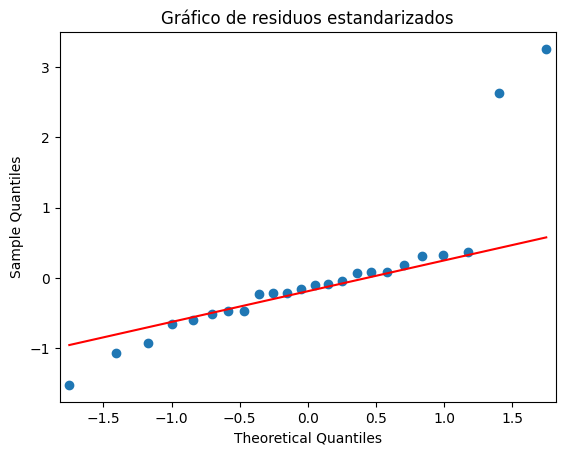

In [ ]:
import statsmodels.api as sm
fig = sm.qqplot(standardized_residuals, line = 'q', fit = True)
plt.title('Gráfico de residuos estandarizados')
plt.show()

Las hipótesis son:
- H_0: Errores distribuyen normal versus H_1: Errores no distribuyen normal

In [ ]:
from scipy.stats import shapiro
stat, p_valor = shapiro(modelo.resid)
stat = round(stat, 3)
p_valor = round(p_valor, 3)
print(f"Estadístico de prueba: {stat}")
print(f"P-valor: {p_valor}")

Estadístico de prueba: 0.761
P-valor: 0.0


El supuesto de normalidad se rechaza, dado que su valor - p es aproximadamente cero, por lo tanto no se estaría cumpliendo el supuesto de normalidad. ¿Posible razón de que no se cumpla el supuesto de normalidad? En el gráfico se observan dos casos muy alejados del resto de los datos.

Los outliers que detectamos al principio en el análisis descriptivo. Existen técnicas para casos que no cumplen el supuesto de normalidad, se mencionarán más adelante.